In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data preprocessing

Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Read data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.iloc[:5, :10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475


### Print out column names

In [4]:
col_names = list(df)
col_names

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

### Normalize data

In [5]:
from sklearn.preprocessing import Normalizer

In [35]:
arr = df.iloc[:,1:].to_numpy()  # bez kolumny "Bankrupt?"

# sklearn.preprocessing.Normalizer działa na wierszach, dlatego transponujemy arr
arr = np.swapaxes(arr, 0, 1)
normalizer = Normalizer().fit(arr)

arr_norm = normalizer.transform(arr)
arr_norm = np.swapaxes(arr_norm, 0, 1)

data_norm = pd.DataFrame(arr_norm, columns=col_names[1:])
data_norm.insert(0, "Bankrupt?", df.iloc[:,0])

In [36]:
data_norm.iloc[:,:20]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons
0,1,0.008820,0.009137,0.008821,0.011976,0.011976,0.012111,0.012104,0.012104,0.012063,0.012102,4.002606e-16,0.000000e+00,0.011861,8.018070e-14,0.000000,0.009256,0.009257,0.009255,0.008859
1,1,0.011050,0.011588,0.011234,0.012151,0.012151,0.012111,0.012111,0.012111,0.012099,0.012110,9.227720e-16,0.000000e+00,0.011958,7.155436e-14,0.000000,0.011402,0.011403,0.011401,0.010943
2,1,0.010141,0.010744,0.010268,0.011976,0.011974,0.012110,0.012096,0.012098,0.012038,0.012091,7.519155e-16,9.505286e-05,0.011871,8.736931e-14,0.000000,0.011131,0.011131,0.012118,0.009458
3,1,0.009516,0.009716,0.009952,0.011619,0.011620,0.012108,0.012105,0.012106,0.012091,0.012106,3.435540e-16,0.000000e+00,0.012057,4.965674e-14,0.000000,0.009646,0.009647,0.009645,0.010146
4,1,0.011068,0.011592,0.011355,0.011923,0.011923,0.012111,0.012111,0.012111,0.012096,0.012111,2.512438e-02,0.000000e+00,0.011981,7.586753e-14,0.000000,0.010480,0.010480,0.010478,0.011131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.011750,0.011615,0.011810,0.012036,0.012036,0.012112,0.012112,0.012112,0.012097,0.012111,4.809019e-16,1.677403e-02,0.012006,1.979634e-14,0.007621,0.010951,0.010952,0.010950,0.011344
6815,0,0.011309,0.011589,0.011396,0.011913,0.011914,0.012112,0.012112,0.012112,0.012098,0.012111,1.662222e-02,5.367691e-03,0.011961,2.621079e-14,0.024980,0.011344,0.011345,0.011343,0.011349
6816,0,0.011251,0.011492,0.011319,0.012155,0.012151,0.012112,0.012112,0.012112,0.012097,0.012111,7.990484e-16,3.873261e-16,0.012225,0.000000e+00,0.032996,0.016862,0.016863,0.016860,0.011047
6817,0,0.012049,0.012055,0.012046,0.012103,0.012104,0.012113,0.012113,0.012113,0.012097,0.012113,3.936326e-16,9.356184e-03,0.012327,2.333535e-14,0.012187,0.013351,0.013351,0.013349,0.011958


### Komentarz: 
Przy niektórych kolumnach (Operating Expense Rate, Interest-bearing debt interest rate) po normalizacji występują bardzo małe wartości, co nie jest możliwe w przypadku wskaźników finansowych, których wartości są zawarte głównie w przedziale [0; 1].

Po zbadaniu sprawy okazuje się, że w takich kolumn jest aż 23 i podano w nich wartości bezwzględne dla niektórych obserwacji.
Ze względu na ten fakt, nie ma sensu usuwać wierszy, w których występuje co najmniej jedna wartość bezwzględna w którejkolwiek kolumnie, gdyż musielibyśmy usunąć prawie wszystko (tak jak pokazywałem na zajęciach zostanie ok. 300 obserwacji z jednej klasy - nie będzie już co klasyfikować).

W związku z powyższym usuwamy te kolumny.

In [37]:
suspicious_cols = [' Operating Expense Rate',
                   ' Research and development expense rate',
                   ' Interest-bearing debt interest rate',
                   ' Revenue Per Share (Yuan ¥)',
                   ' Net Value Growth Rate',
                   ' Current Ratio',
                   ' Quick Ratio',
                   ' Total debt/Total net worth',
                   ' Accounts Receivable Turnover',
                   ' Average Collection Days',
                   ' Inventory Turnover Rate (times)',
                   ' Fixed Assets Turnover Frequency',
                   ' Revenue per person',
                   ' Allocation rate per person',
                   ' Quick Assets/Current Liability',
                   ' Cash/Current Liability',
                   ' Inventory/Current Liability',
                   ' Long-term Liability to Current Assets',
                   ' Current Asset Turnover Rate',
                   ' Quick Asset Turnover Rate',
                   ' Cash Turnover Rate',
                   ' Fixed Assets to Assets',
                   ' Total assets to GNP price'
                  ]
len(suspicious_cols)

23

In [38]:
names_subset = set(col_names).difference(set(suspicious_cols))
names_subset.remove(' Total Asset Growth Rate')  # the majority of observations have absolute values
names_subset.remove(' Net Income Flag')  # all observations have vlaue=1

df_bool = df[names_subset] < 1000
df_clean = df[names_subset][df_bool.all(axis=1)]
df_clean  # data without normailizng

,CFO to Assets,Working capitcal Turnover Rate,Persistent EPS in the Last Four Seasons,After-tax net Interest Rate,After-tax Net Profit Growth Rate,Net Value Per Share (A),Net Worth Turnover Rate (times),Per Share Net profit before tax (Yuan ¥),No-credit Interval,Current Liability to Liability,...,Gross Profit to Sales,Net Income to Total Assets,Cash flow rate,Cash Flow to Liability,Inventory/Working Capital,Current Liability to Current Assets,Interest Expense Ratio,Current Liability to Assets,Liability to Equity,Cash Reinvestment %
0,0.520382,0.593831,0.169141,0.808809,0.688979,0.147950,0.032903,0.138736,0.622879,0.676269,...,0.601453,0.716845,0.458143,0.458609,0.276920,0.118250,0.629951,0.147308,0.290202,0.363725
1,0.567101,0.593916,0.208944,0.809301,0.689693,0.182251,0.025484,0.169918,0.623652,0.308589,...,0.610237,0.795297,0.461867,0.459001,0.289642,0.047775,0.635172,0.056963,0.283846,0.376709
2,0.538491,0.594502,0.180581,0.808388,0.689463,0.177911,0.013387,0.142803,0.623841,0.446027,...,0.601449,0.774670,0.458521,0.459254,0.277456,0.025346,0.629631,0.098162,0.290189,0.368913
3,0.604105,0.593889,0.193722,0.808966,0.689110,0.154187,0.028065,0.148603,0.622929,0.615848,...,0.583538,0.739555,0.465705,0.448518,0.276580,0.067250,0.630228,0.098715,0.281721,0.384077
4,0.578469,0.593915,0.212537,0.809304,0.689697,0.167502,0.040161,0.168412,0.623521,0.975007,...,0.598782,0.795016,0.462746,0.454411,0.287913,0.047725,0.636055,0.110195,0.278514,0.379690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.587178,0.593985,0.216602,0.809331,0.689778,0.175045,0.027903,0.172102,0.623620,0.786888,...,0.604455,0.799927,0.463734,0.458639,0.277543,0.027951,0.631415,0.103838,0.279606,0.380155
6815,0.569498,0.593954,0.216697,0.809327,0.689734,0.181324,0.027419,0.172780,0.623931,0.849898,...,0.598306,0.799748,0.461978,0.459058,0.277368,0.031470,0.631489,0.089901,0.278132,0.377389
6816,0.589341,0.594025,0.210929,0.809317,0.689202,0.269521,0.022419,0.173232,0.624156,0.553964,...,0.610441,0.797778,0.472189,0.452465,0.277022,0.007542,0.630612,0.024414,0.275789,0.379392
6817,0.678338,0.593997,0.228326,0.809399,0.696113,0.213392,0.027258,0.185584,0.623957,0.893241,...,0.607846,0.811808,0.476123,0.471313,0.277353,0.022916,0.630731,0.083199,0.277547,0.401028


### Boxplots

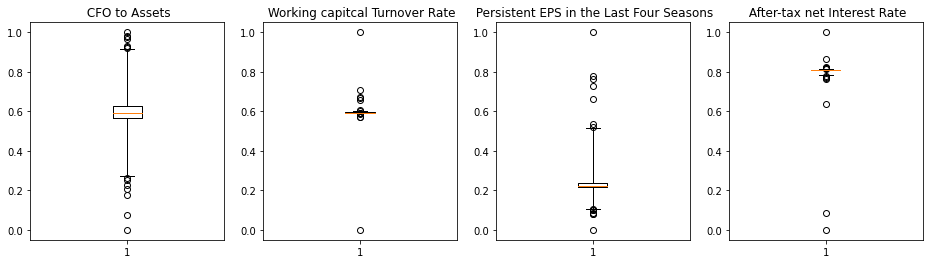

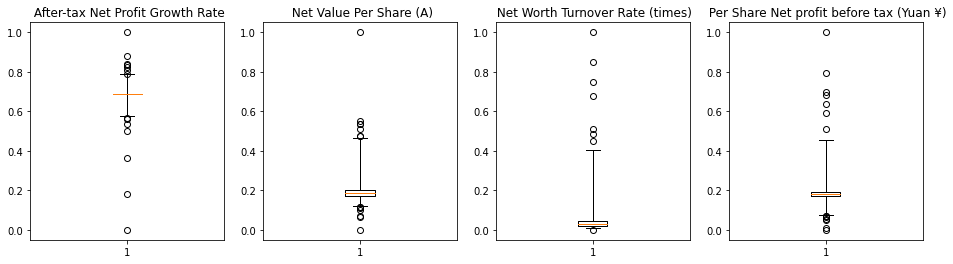

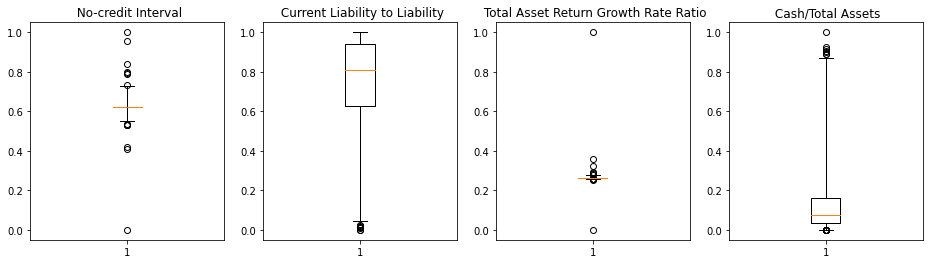

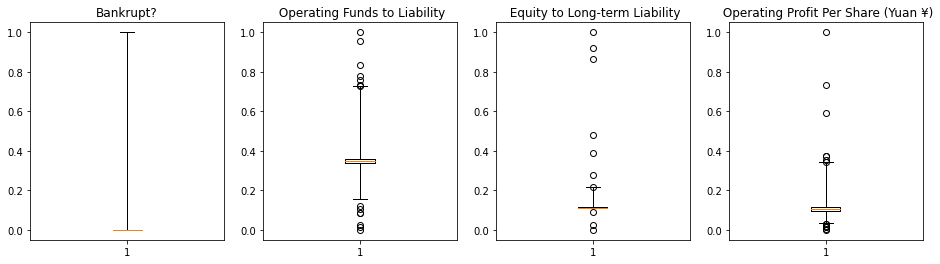

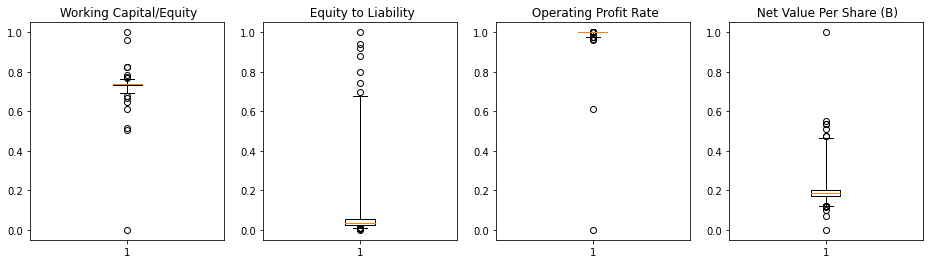

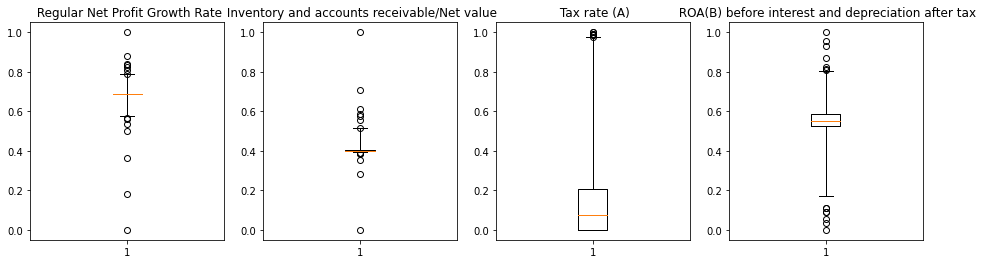

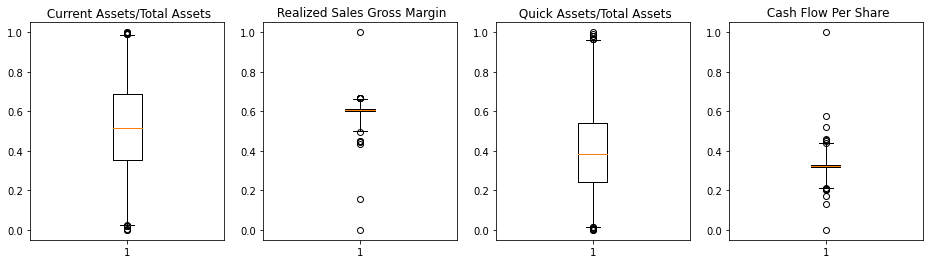

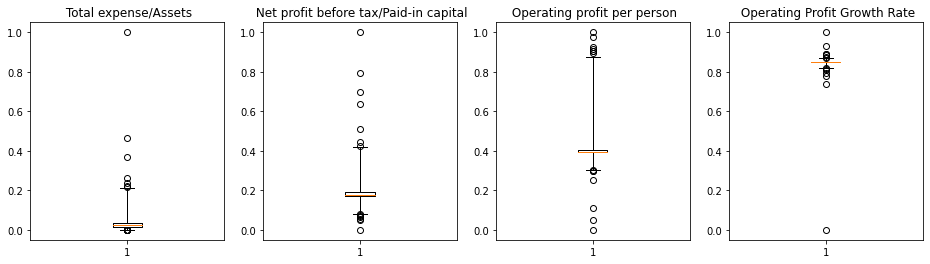

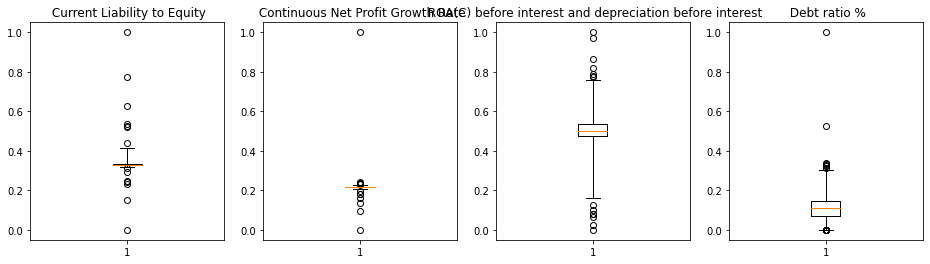

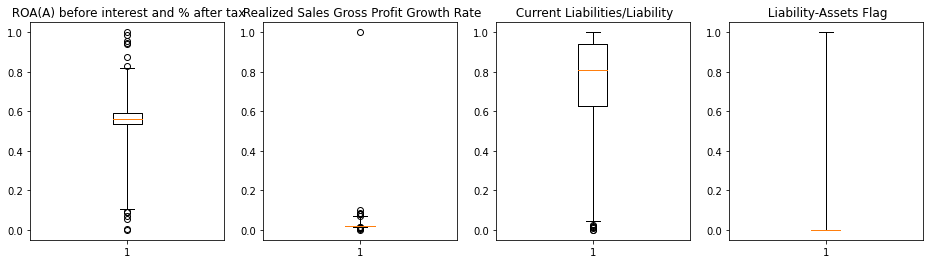

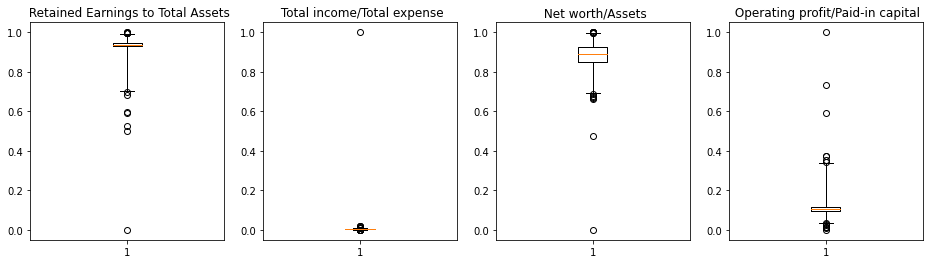

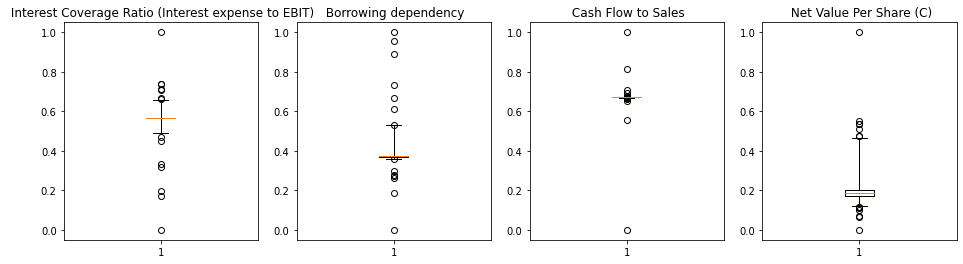

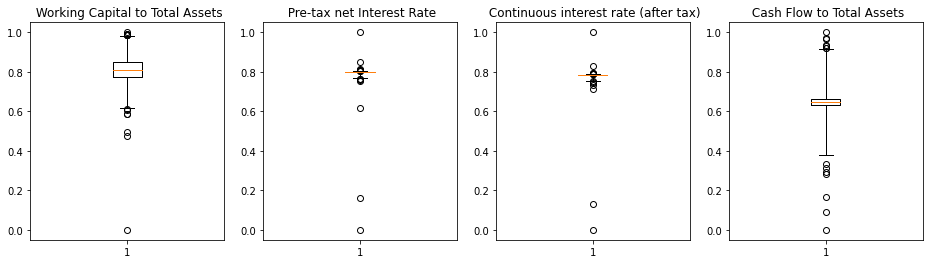

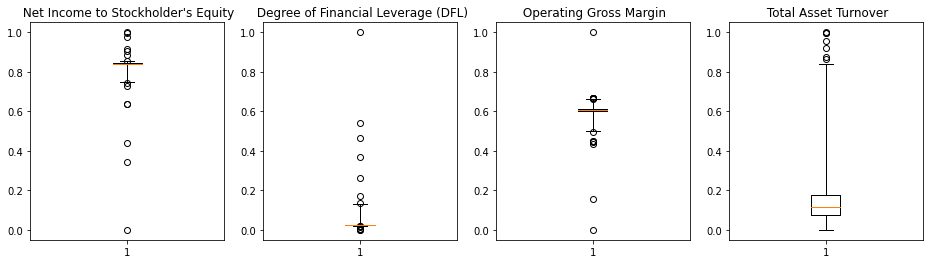

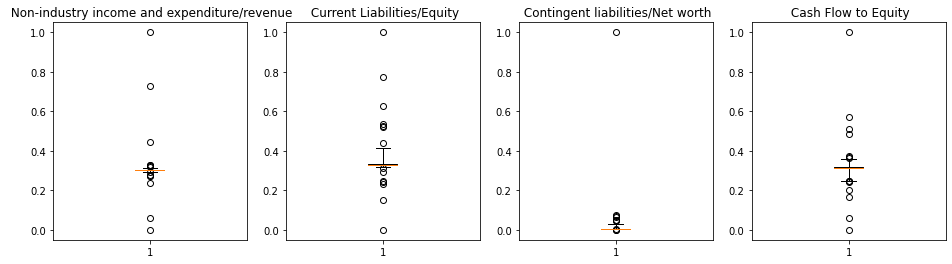

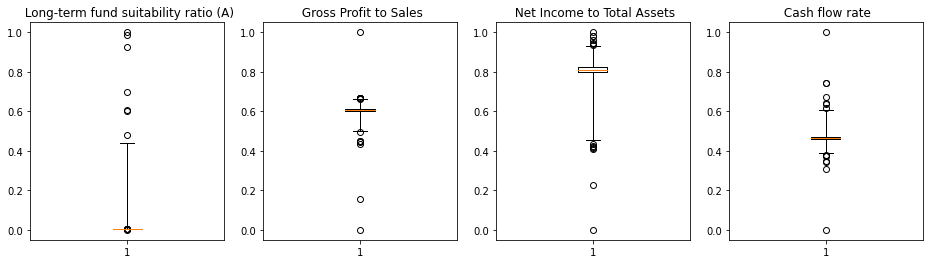

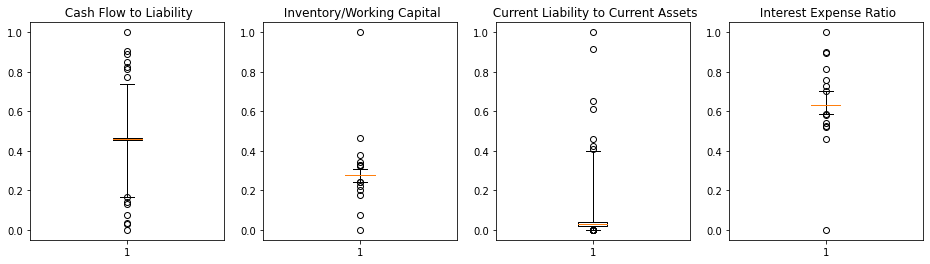

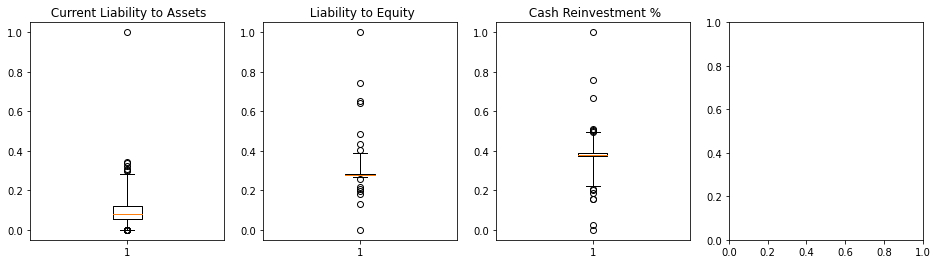

In [56]:
# Origin Data
for i, col in enumerate(names_subset):
    if i % 4 == 0:
        fig, ax = plt.subplots(1, 4, figsize=(16,4))
        ax[i%4].boxplot(df_clean[col], whis=(0.1, 99.9), autorange=True)
        ax[i%4].set_title(col)
    elif i % 4 == 3:
        ax[i%4].boxplot(df_clean[col], whis=(0.1, 99.9), autorange=True)
        ax[i%4].set_title(col)
        plt.show()
    else:
        ax[i%4].boxplot(df_clean[col], whis=(0.1, 99.9))
        ax[i%4].set_title(col)

### Komentarz:

Widzimy, że w danych zarówno pierwotnych, jak i znormalizowanych, występuje sporo wartości zerowych.
Dla algorytmów drzewa decyzyjnego i lasu losowego to żaden problem, natomiast SVM i sieci neuronowe będzie to istotnie zakłócało.

A zatem dla SVM i NN będziemy stosować skalowanie do zakresu [0.05, 0.95]. Ponieważ wszystkie kolumny zawierają wartości z przedziału [0, 1] wystarczy skorzystać ze wzoru:
    
    X_scaled = 0.9*x + 0.05.

In [149]:
X = np.array(df[names_subset.difference(set(['Bankrupt?']))])
X_scaled = X * 0.9 + 0.05
data_scaled = pd.DataFrame(X_scaled, columns=names_subset.difference(set(['Bankrupt?'])))
data_scaled.insert(0, "Bankrupt?", df.iloc[:,0])

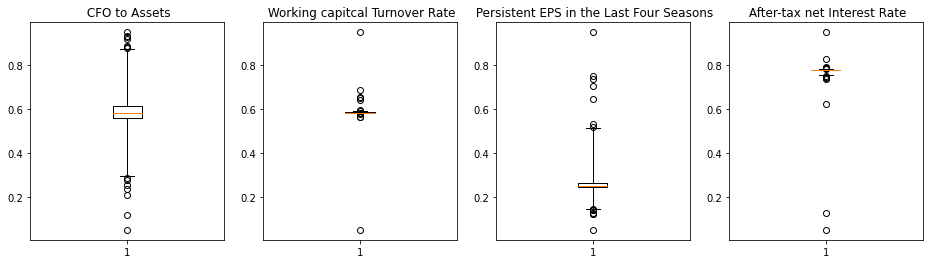

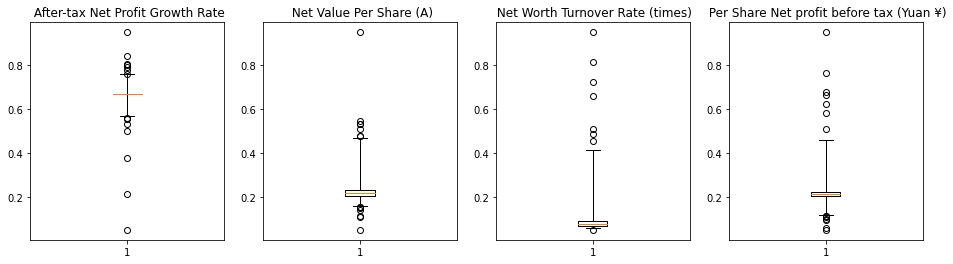

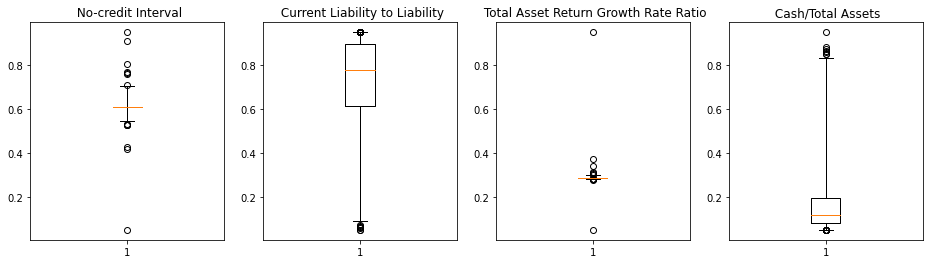

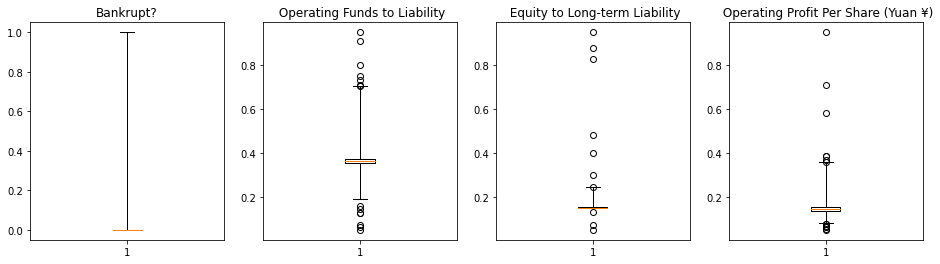

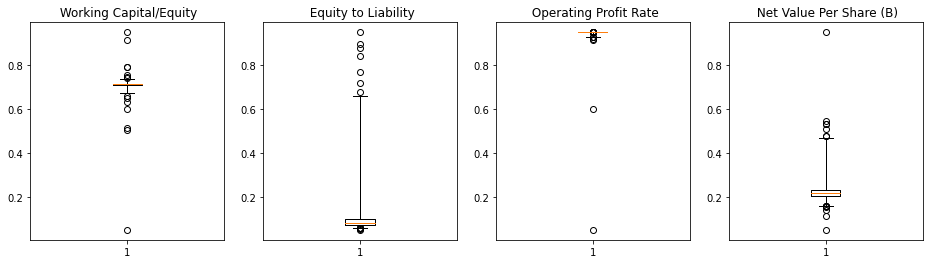

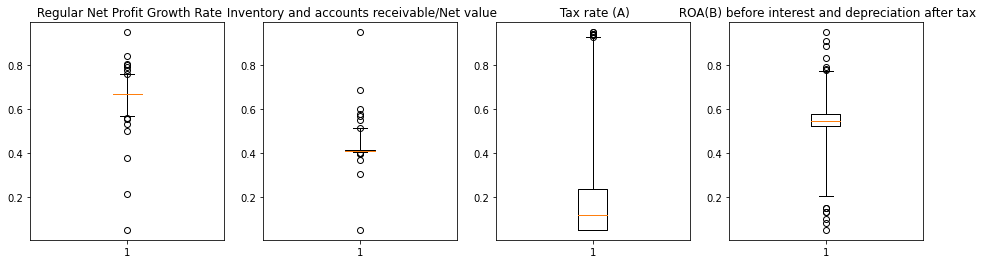

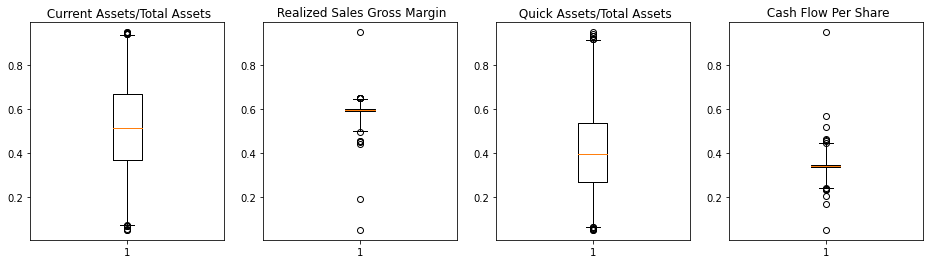

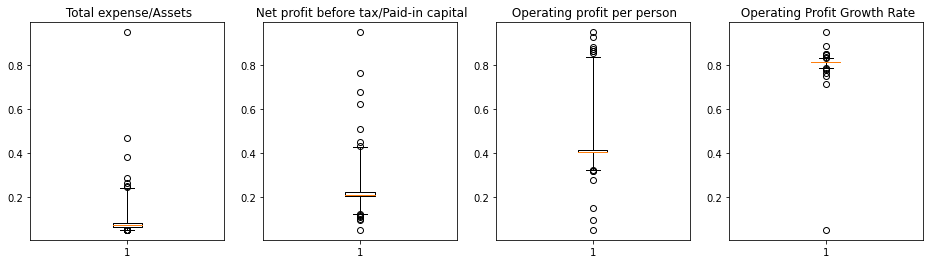

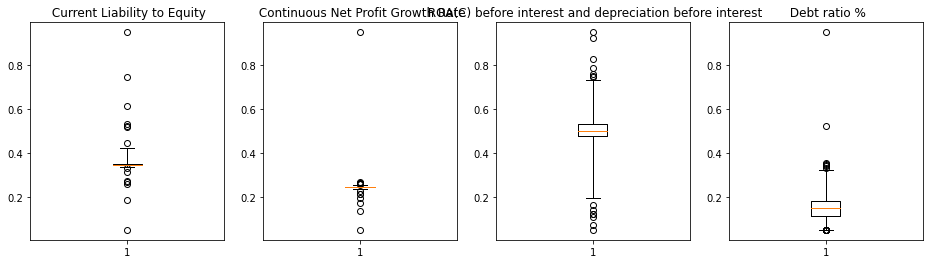

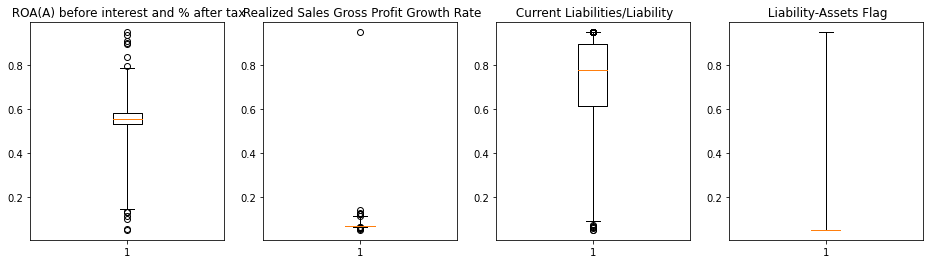

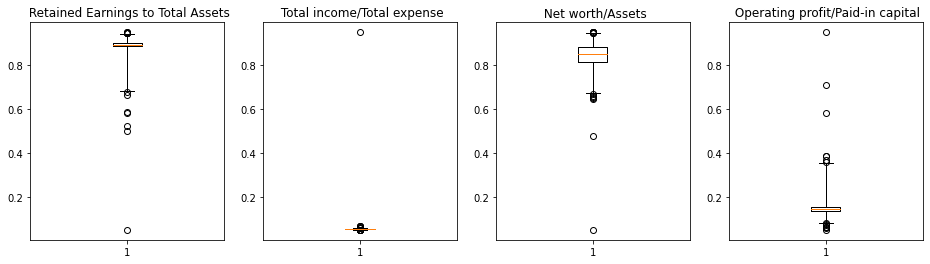

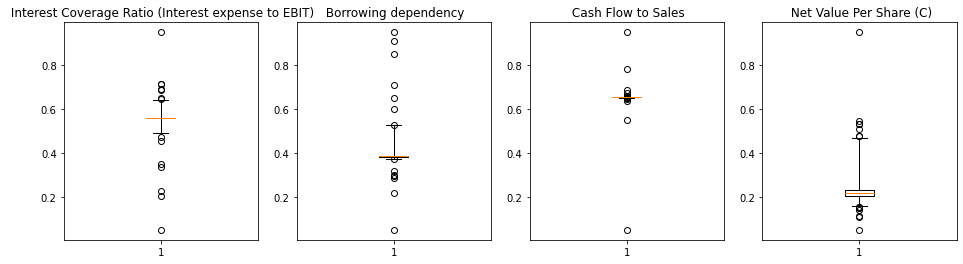

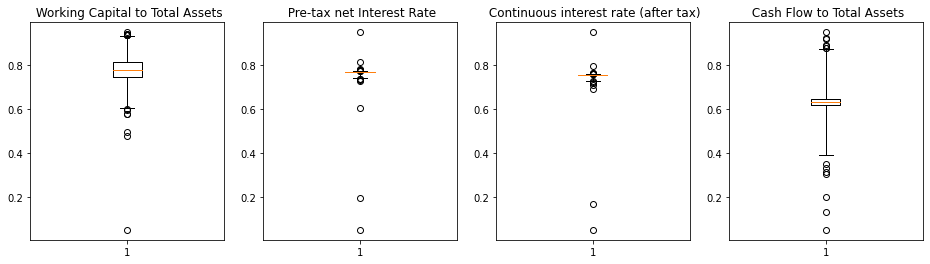

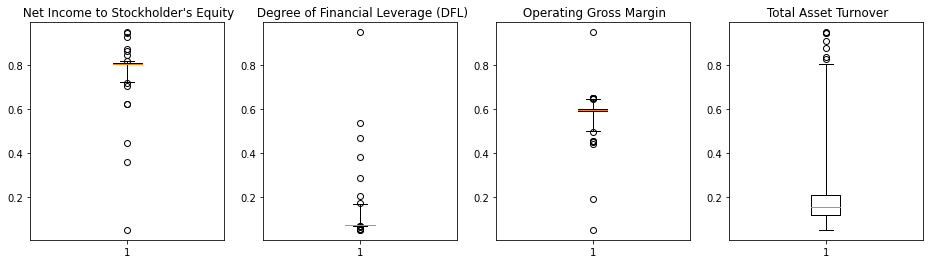

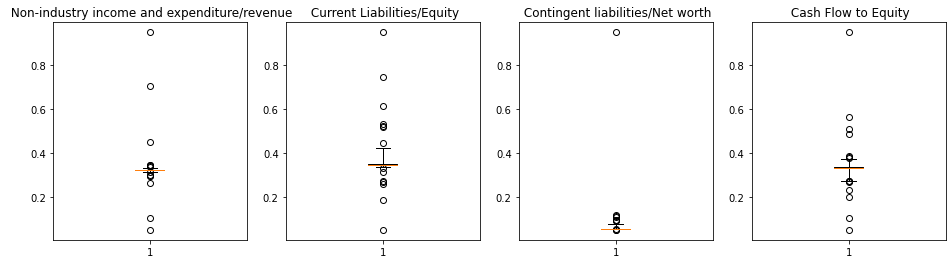

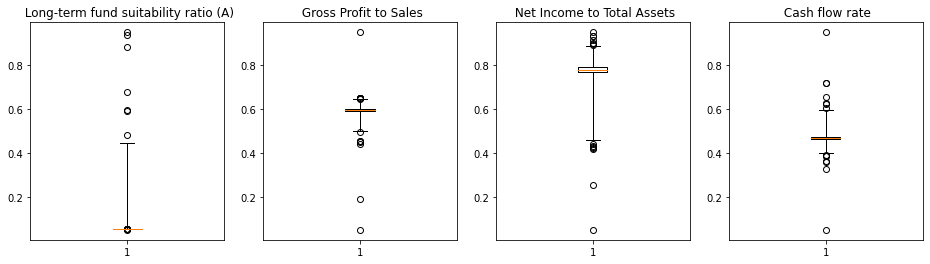

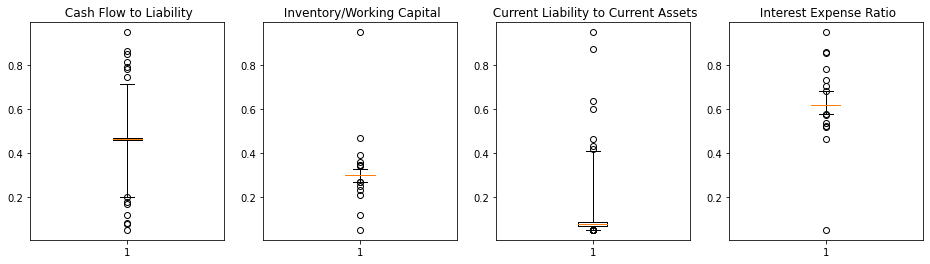

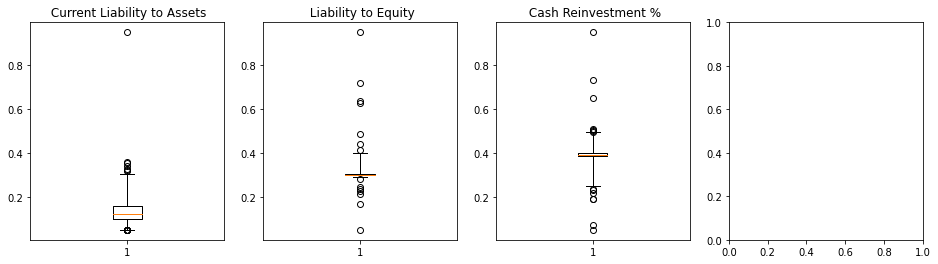

In [150]:
# Scaled Data
for i, col in enumerate(names_subset):
    if i % 4 == 0:
        fig, ax = plt.subplots(1, 4, figsize=(16,4))
        ax[i%4].boxplot(data_scaled[col], whis=(0.1, 99.9), autorange=True)
        ax[i%4].set_title(col)
    elif i % 4 == 3:
        ax[i%4].boxplot(data_scaled[col], whis=(0.1, 99.9), autorange=True)
        ax[i%4].set_title(col)
        plt.show()
    else:
        ax[i%4].boxplot(data_scaled[col], whis=(0.1, 99.9))
        ax[i%4].set_title(col)

## Feature Selection

### print out new list of columns

In [86]:
col_names = list(df_clean)
col_names

[' CFO to Assets',
 ' Working capitcal Turnover Rate',
 ' Persistent EPS in the Last Four Seasons',
 ' After-tax net Interest Rate',
 ' After-tax Net Profit Growth Rate',
 ' Net Value Per Share (A)',
 ' Net Worth Turnover Rate (times)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' No-credit Interval',
 ' Current Liability to Liability',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash/Total Assets',
 'Bankrupt?',
 ' Operating Funds to Liability',
 ' Equity to Long-term Liability',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Working Capital/Equity',
 ' Equity to Liability',
 ' Operating Profit Rate',
 ' Net Value Per Share (B)',
 ' Regular Net Profit Growth Rate',
 ' Inventory and accounts receivable/Net value',
 ' Tax rate (A)',
 ' ROA(B) before interest and depreciation after tax',
 ' Current Assets/Total Assets',
 ' Realized Sales Gross Margin',
 ' Quick Assets/Total Assets',
 ' Cash Flow Per Share',
 ' Total expense/Assets',
 ' Net profit before tax/Paid-in capital',
 ' Operati

### Komentarz:

Wiele z powyższych kolumn w pewnym stopniu powtarzają się (wskaźników ROA - 3 rodazje, net value per share - 3 rodzaje, dla niektórych wskaźników podano wartości przed i po opodatkowaniu), czyli nie wnoszą one dodatkowej wartości z punktu widzenia algorytmów uczenia maszynowego.

Dlatego planuję zagłębić temat co oznaczają poszczególne wskaźniki i na tej podstawie wybrać sensowny podzbior wskaźników, na których będę budował algorytmy ML. Poniżej jest beta wersja takiego podzbioru - są to cechy, które na pierwszy rzut oka wszystkie wnoszą istotny "kawałek" wiedzy i ta wiedza nie koliduje się z innymi wskaźnikami.

In [87]:
features_subset_demo = [' Cash Flow to Total Assets', ' Total Asset Turnover', ' Total expense/Assets', ' Debt ratio %',
                        ' Cash Reinvestment %', ' Net Income to Total Assets', ' Current Assets/Total Assets',
                       ' Cash Flow to Liability', ' Current Liabilities/Liability', ' Net worth/Assets', 
                        ' Quick Assets/Total Assets', ' Persistent EPS in the Last Four Seasons',
                       'Bankrupt?']
print(f"Liczba cech: {len(features_subset_demo) - 1}")

Liczba cech: 12


In [88]:
data_1 = df_clean[features_subset_demo]

# 2. Try to balance data with oversampling

In [89]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

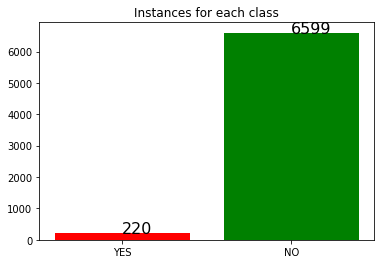

In [90]:
num_yes = len(data_1[data_1['Bankrupt?'] == 1])
num_no = len(data_1[data_1['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
plt.title("Instances for each class")
add_value_label(['YES', 'NO'], [num_yes, num_no])

### Komentarz:
(bazując na tym źródle: https://www.openstarts.units.it/bitstream/10077/4002/1/Menardi%20Torelli%20DEAMS%20WPS2)

Bardzo ważne, jeśli korzystamy z oversamplingu, żeby stosować go jedynie do generowania danych treningowych. 
Dane testowe nie powinny zawierać sztucznych obserwacji, gdyż nie możemy mieć pewności, czy rzeczywiście odpowiadałyby one  jakimś instancjom w realnym świecie.

A zatem schemat Oversamplingu wygląda następująco:

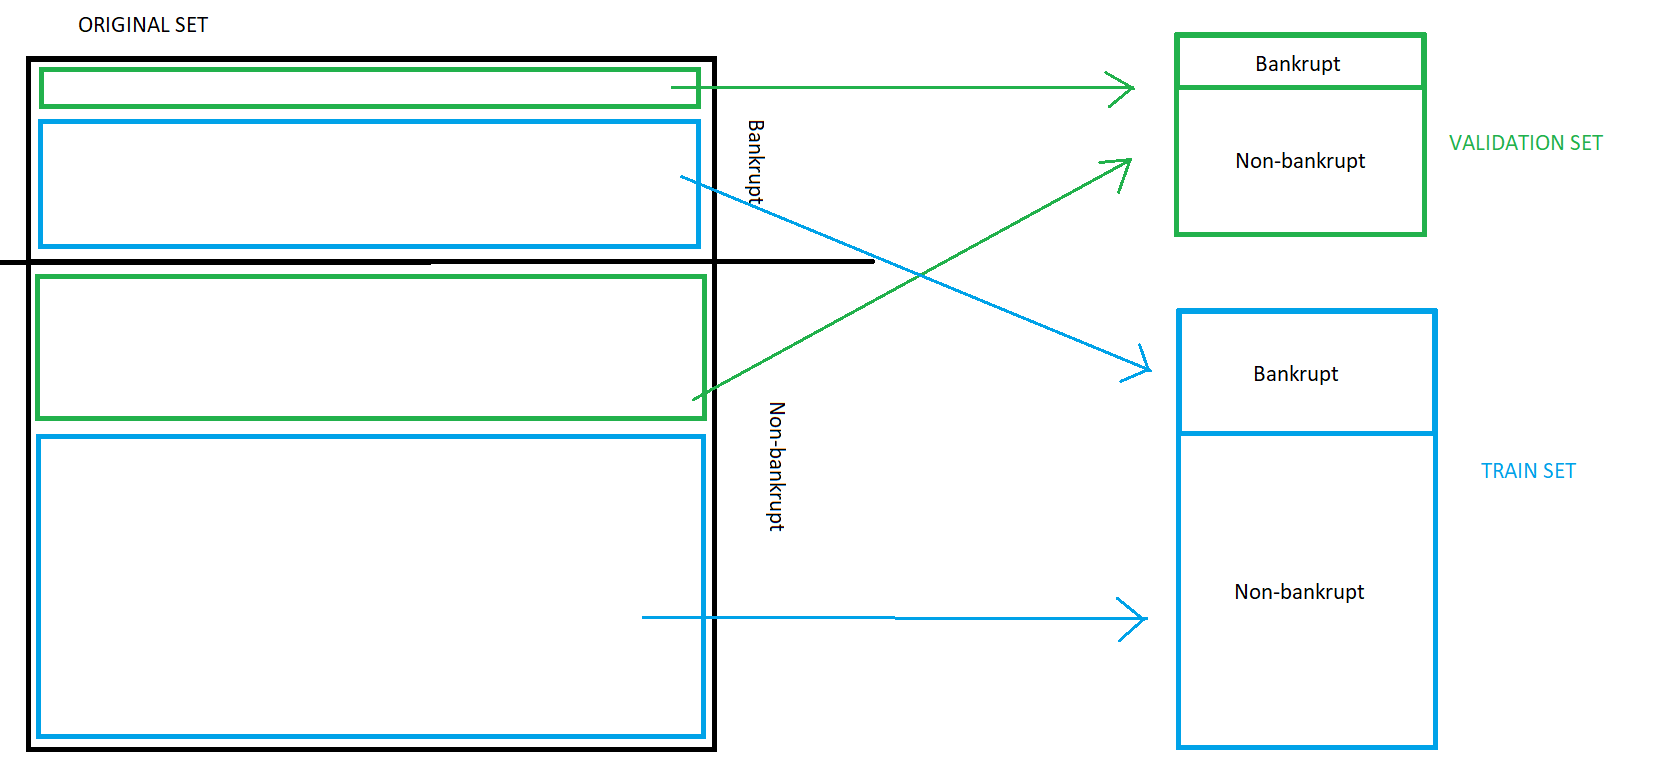

In [166]:
X = data_1.iloc[:,:-1].to_numpy()
Y = data_1.iloc[:,-1].to_numpy().reshape(len(data_1))

In [167]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from collections import Counter

### Split data

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X_scaled_test = X_test * 0.9 + 0.05
print(np.unique(Y_test, return_counts=True)[1])

[1973   73]


## ROSE

In [170]:
rose = RandomOverSampler(random_state=31)
X_rose, Y_rose = rose.fit_resample(X_train, Y_train)
X_scaled_rose = X_rose * 0.9 + 0.05

print(Counter(Y_rose))

Counter({0: 4626, 1: 4626})


## SMOTE

In [171]:
sm = SMOTE(random_state=42)
X_sm, Y_sm = sm.fit_resample(X_train, Y_train)
X_scaled_sm = X_sm * 0.9 + 0.05

print(Counter(Y_sm))

Counter({0: 4626, 1: 4626})


## Training

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
f1_scores = {}

### * Random Forest

In [172]:
print("\t\tRANDOM FOREST FOR ROSE")

rf_rose = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_rose.fit(X_rose, Y_rose)

y_pred = rf_rose.predict(X_test)
f1_scores['Random Forest ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1820  153]
 [  24   49]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1973
           1       0.24      0.67      0.36        73

    accuracy                           0.91      2046
   macro avg       0.61      0.80      0.65      2046
weighted avg       0.96      0.91      0.93      2046



In [173]:
print("\t\tRANDOM FOREST FOR SMOTE")

rf_smote = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_smote.fit(X_sm, Y_sm)

y_pred = rf_smote.predict(X_test)
f1_scores['Random Forest SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1767  206]
 [  14   59]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1973
           1       0.22      0.81      0.35        73

    accuracy                           0.89      2046
   macro avg       0.61      0.85      0.65      2046
weighted avg       0.96      0.89      0.92      2046



### * SVM

In [102]:
from sklearn import svm
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [174]:
print("\t\tSVM FOR ROSE")
clf_rose = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_rose.fit(X_scaled_rose, Y_rose)

y_pred = clf_rose.predict(X_scaled_test)
f1_scores['SVM ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1669  304]
 [   9   64]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1973
           1       0.17      0.88      0.29        73

    accuracy                           0.85      2046
   macro avg       0.58      0.86      0.60      2046
weighted avg       0.97      0.85      0.89      2046



In [175]:
print("\t\tSVM FOR SMOTE")
clf_smote = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_smote.fit(X_scaled_sm, Y_sm)

y_pred = clf_smote.predict(X_scaled_test)
f1_scores['SVM SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1680  293]
 [  10   63]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1973
           1       0.18      0.86      0.29        73

    accuracy                           0.85      2046
   macro avg       0.59      0.86      0.61      2046
weighted avg       0.96      0.85      0.90      2046



### * Neural Network

In [137]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import regularizers

In [162]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [176]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_rose = tf.keras.Sequential()
model_rose.add(tf.keras.layers.Dense(4, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.2))

model_rose.add(tf.keras.layers.Dense(8, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.2))

model_rose.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_rose.summary()

model_rose.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_rose = model_rose.fit(X_scaled_rose, Y_rose, 
                    validation_data=(X_scaled_test, Y_test),
                    batch_size=128,
                    epochs=200)


print("\n\n\t\tNeural Network for ROSE")

y_pred = model_rose.predict(X_scaled_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 52        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 [==============================] - 1s 3ms/step - loss: 0.6947 - f1_m: 0.6029 - val_loss: 0.7195 - val_f1

73/73 [==============================] - 0s 1ms/step - loss: 0.6076 - f1_m: 0.7125 - val_loss: 0.6015 - val_f1_m: 0.1926
Epoch 55/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6039 - f1_m: 0.7184 - val_loss: 0.5994 - val_f1_m: 0.1907
Epoch 56/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6013 - f1_m: 0.7139 - val_loss: 0.5974 - val_f1_m: 0.1921
Epoch 57/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6021 - f1_m: 0.7092 - val_loss: 0.5946 - val_f1_m: 0.1928
Epoch 58/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6020 - f1_m: 0.7121 - val_loss: 0.5916 - val_f1_m: 0.1955
Epoch 59/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5983 - f1_m: 0.7155 - val_loss: 0.5913 - val_f1_m: 0.1928
Epoch 60/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5957 - f1_m: 0.7184 - val_loss: 0.5887 - val_f1_m: 0.1937
Epoch 61/200
73/73 [==============================] - 0s 1ms/step - loss: 0

73/73 [==============================] - 0s 1ms/step - loss: 0.5062 - f1_m: 0.7690 - val_loss: 0.4768 - val_f1_m: 0.2281
Epoch 116/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5120 - f1_m: 0.7571 - val_loss: 0.4817 - val_f1_m: 0.2233
Epoch 117/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5102 - f1_m: 0.7592 - val_loss: 0.4762 - val_f1_m: 0.2271
Epoch 118/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5084 - f1_m: 0.7676 - val_loss: 0.4748 - val_f1_m: 0.2279
Epoch 119/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5083 - f1_m: 0.7710 - val_loss: 0.4753 - val_f1_m: 0.2258
Epoch 120/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5047 - f1_m: 0.7623 - val_loss: 0.4719 - val_f1_m: 0.2285
Epoch 121/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5056 - f1_m: 0.7646 - val_loss: 0.4615 - val_f1_m: 0.2383
Epoch 122/200
73/73 [==============================] - 0s 1ms/step - 

Epoch 176/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4581 - f1_m: 0.7872 - val_loss: 0.4017 - val_f1_m: 0.2504
Epoch 177/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4578 - f1_m: 0.7859 - val_loss: 0.4138 - val_f1_m: 0.2394
Epoch 178/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4525 - f1_m: 0.7927 - val_loss: 0.4130 - val_f1_m: 0.2398
Epoch 179/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4550 - f1_m: 0.7862 - val_loss: 0.4117 - val_f1_m: 0.2398
Epoch 180/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4573 - f1_m: 0.7848 - val_loss: 0.4096 - val_f1_m: 0.2412
Epoch 181/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4584 - f1_m: 0.7813 - val_loss: 0.4109 - val_f1_m: 0.2405
Epoch 182/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4566 - f1_m: 0.7853 - val_loss: 0.4175 - val_f1_m: 0.2353
Epoch 183/200
73/73 [==============================] - 

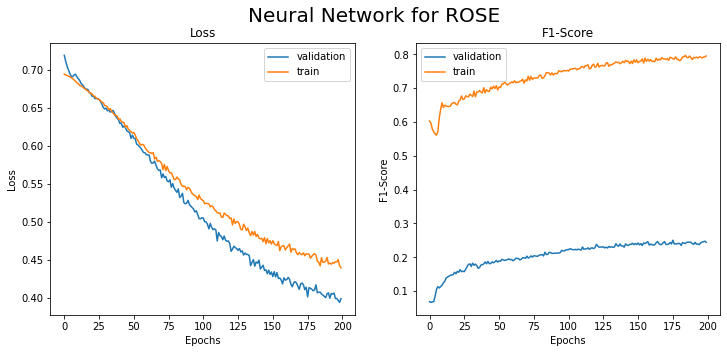

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_rose.history['val_loss'])
ax[0].plot(history_rose.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_rose.history['val_f1_m'])
ax[1].plot(history_rose.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

In [179]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_smote = tf.keras.Sequential()
model_smote.add(tf.keras.layers.Dense(4, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.2))

model_smote.add(tf.keras.layers.Dense(8, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.2))

model_smote.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_smote.summary()

model_smote.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_smote = model_smote.fit(X_scaled_rose, Y_rose, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=200)


print("\n\n\t\tNeural Network for SMOTE")

y_pred = model_smote.predict(X_scaled_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 52        
_________________________________________________________________
dropout_8 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 [==============================] - 1s 3ms/step - loss: 0.7126 - f1_m: 0.5825 - val_loss: 0.7868 - val_f1

73/73 [==============================] - 0s 1ms/step - loss: 0.6229 - f1_m: 0.7169 - val_loss: 0.5541 - val_f1_m: 0.2487
Epoch 55/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6201 - f1_m: 0.7193 - val_loss: 0.5561 - val_f1_m: 0.2393
Epoch 56/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6183 - f1_m: 0.7259 - val_loss: 0.5516 - val_f1_m: 0.2401
Epoch 57/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6145 - f1_m: 0.7287 - val_loss: 0.5449 - val_f1_m: 0.2451
Epoch 58/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6107 - f1_m: 0.7291 - val_loss: 0.5454 - val_f1_m: 0.2392
Epoch 59/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6113 - f1_m: 0.7289 - val_loss: 0.5456 - val_f1_m: 0.2363
Epoch 60/200
73/73 [==============================] - 0s 1ms/step - loss: 0.6091 - f1_m: 0.7286 - val_loss: 0.5366 - val_f1_m: 0.2449
Epoch 61/200
73/73 [==============================] - 0s 1ms/step - loss: 0

73/73 [==============================] - 0s 1ms/step - loss: 0.5196 - f1_m: 0.7845 - val_loss: 0.3714 - val_f1_m: 0.2879
Epoch 116/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5156 - f1_m: 0.7884 - val_loss: 0.3665 - val_f1_m: 0.2934
Epoch 117/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5130 - f1_m: 0.7864 - val_loss: 0.3636 - val_f1_m: 0.2934
Epoch 118/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5165 - f1_m: 0.7832 - val_loss: 0.3676 - val_f1_m: 0.3021
Epoch 119/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5094 - f1_m: 0.7921 - val_loss: 0.3594 - val_f1_m: 0.2924
Epoch 120/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5114 - f1_m: 0.7872 - val_loss: 0.3563 - val_f1_m: 0.2933
Epoch 121/200
73/73 [==============================] - 0s 1ms/step - loss: 0.5082 - f1_m: 0.7874 - val_loss: 0.3557 - val_f1_m: 0.2933
Epoch 122/200
73/73 [==============================] - 0s 1ms/step - 

73/73 [==============================] - 0s 1ms/step - loss: 0.4533 - f1_m: 0.8175 - val_loss: 0.2493 - val_f1_m: 0.3254
Epoch 176/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4547 - f1_m: 0.8180 - val_loss: 0.2578 - val_f1_m: 0.3136
Epoch 177/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4527 - f1_m: 0.8163 - val_loss: 0.2555 - val_f1_m: 0.3148
Epoch 178/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4537 - f1_m: 0.8137 - val_loss: 0.2477 - val_f1_m: 0.3247
Epoch 179/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4543 - f1_m: 0.8155 - val_loss: 0.2518 - val_f1_m: 0.3136
Epoch 180/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4566 - f1_m: 0.8213 - val_loss: 0.2466 - val_f1_m: 0.3226
Epoch 181/200
73/73 [==============================] - 0s 1ms/step - loss: 0.4585 - f1_m: 0.8135 - val_loss: 0.2469 - val_f1_m: 0.3190
Epoch 182/200
73/73 [==============================] - 0s 1ms/step - 

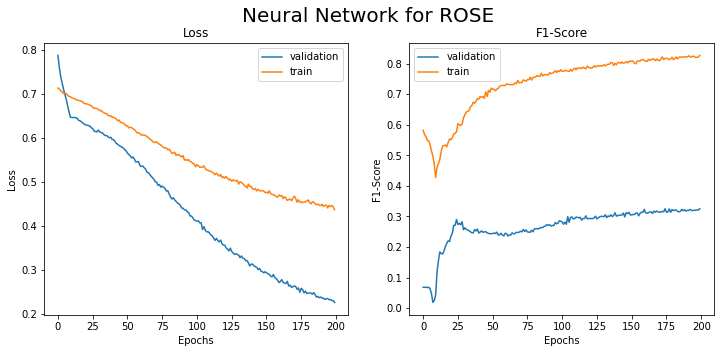

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_smote.history['val_loss'])
ax[0].plot(history_smote.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_smote.history['val_f1_m'])
ax[1].plot(history_smote.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

# 3. Weights

### Komentarz:

Możemy definiować "customowe" wagi dla każdej klasy, które są wykorzystywane następnie przy obliczaniu funkcji kosztu.

In [181]:
cl_weights = {0: 1, 1: 10}

W ten sposób nakładamy na nasz algorytm 10-krotnie większą odpowiedzialność, gdy źle zaklasyfikuje obserwację z klasy 1.

### * Random Forest

In [183]:
print("\t\tRANDOM FOREST WITH CUSTOM WEIGHTS")

rf_weights = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight=cl_weights, max_depth=6, random_state=35)
rf_weights.fit(X_train, Y_train)

y_pred = rf_weights.predict(X_test)
f1_scores['Random Forest with weights'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST WITH CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1901   72]
 [  34   39]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1973
           1       0.35      0.53      0.42        73

    accuracy                           0.95      2046
   macro avg       0.67      0.75      0.70      2046
weighted avg       0.96      0.95      0.95      2046



### * SVM

In [184]:
X_scaled_train = X_train * 0.9 + 0.05

In [185]:
print("\t\tSVM FOR CUSTOM WEIGHTS")

cl_weights = {0: 1, 1: 6}
clf_weights = svm.SVC(kernel=kernel_functions[0], class_weight=cl_weights) # Linear Kernel
clf_weights.fit(X_scaled_train, Y_train)

y_pred = clf_weights.predict(X_scaled_test)
f1_scores['SVM with weights'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1938   35]
 [  41   32]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1973
           1       0.48      0.44      0.46        73

    accuracy                           0.96      2046
   macro avg       0.73      0.71      0.72      2046
weighted avg       0.96      0.96      0.96      2046



### * Neural Network

In [193]:
cl_weights = {0: 1, 1: 15}

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_weights = tf.keras.Sequential()
model_weights.add(tf.keras.layers.Dense(8, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.2))

model_weights.add(tf.keras.layers.Dense(16, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.2))

model_weights.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.4))

model_weights.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_weights.summary()

model_weights.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_weights = model_weights.fit(X_scaled_train, Y_train, 
                    validation_data=(X_scaled_test, Y_test),
                    batch_size=128,
                    epochs=250,
                    class_weight=cl_weights)


print("\n\n\t\tNeural Network for Custom Weights")

y_pred = model_weights.predict(X_scaled_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network with weights'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_20 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                

38/38 [==============================] - 0s 2ms/step - loss: 0.9018 - f1_m: 0.0000e+00 - val_loss: 0.4338 - val_f1_m: 0.0000e+00
Epoch 51/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8982 - f1_m: 0.0000e+00 - val_loss: 0.4342 - val_f1_m: 0.0000e+00
Epoch 52/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9002 - f1_m: 0.0000e+00 - val_loss: 0.4365 - val_f1_m: 0.0000e+00
Epoch 53/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8939 - f1_m: 0.0075 - val_loss: 0.4339 - val_f1_m: 0.0000e+00
Epoch 54/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9042 - f1_m: 0.0132 - val_loss: 0.4389 - val_f1_m: 0.0000e+00
Epoch 55/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8876 - f1_m: 0.0000e+00 - val_loss: 0.4361 - val_f1_m: 0.0000e+00
Epoch 56/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8971 - f1_m: 0.0000e+00 - val_loss: 0.4325 - val_f1_m: 0.0000e+00
Epoch 57/250
38/38 [=======

38/38 [==============================] - 0s 2ms/step - loss: 0.8653 - f1_m: 0.0348 - val_loss: 0.3940 - val_f1_m: 0.0000e+00
Epoch 109/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8506 - f1_m: 0.0756 - val_loss: 0.3938 - val_f1_m: 0.0000e+00
Epoch 110/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8511 - f1_m: 0.0361 - val_loss: 0.3855 - val_f1_m: 0.0000e+00
Epoch 111/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8492 - f1_m: 0.0703 - val_loss: 0.3871 - val_f1_m: 0.0000e+00
Epoch 112/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8356 - f1_m: 0.0430 - val_loss: 0.3843 - val_f1_m: 0.0000e+00
Epoch 113/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8572 - f1_m: 0.0265 - val_loss: 0.3798 - val_f1_m: 0.0000e+00
Epoch 114/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8455 - f1_m: 0.0419 - val_loss: 0.3865 - val_f1_m: 0.0000e+00
Epoch 115/250
38/38 [====================

38/38 [==============================] - 0s 2ms/step - loss: 0.8085 - f1_m: 0.1574 - val_loss: 0.3636 - val_f1_m: 0.2458
Epoch 169/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7922 - f1_m: 0.1831 - val_loss: 0.3660 - val_f1_m: 0.2434
Epoch 170/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8012 - f1_m: 0.1536 - val_loss: 0.3678 - val_f1_m: 0.2378
Epoch 171/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8083 - f1_m: 0.1805 - val_loss: 0.3673 - val_f1_m: 0.2378
Epoch 172/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8296 - f1_m: 0.1199 - val_loss: 0.3720 - val_f1_m: 0.2165
Epoch 173/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8027 - f1_m: 0.1334 - val_loss: 0.3666 - val_f1_m: 0.2364
Epoch 174/250
38/38 [==============================] - 0s 2ms/step - loss: 0.8003 - f1_m: 0.1165 - val_loss: 0.3626 - val_f1_m: 0.2378
Epoch 175/250
38/38 [==============================] - 0s 2ms/step - 

Epoch 229/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7494 - f1_m: 0.1794 - val_loss: 0.3297 - val_f1_m: 0.2719
Epoch 230/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7521 - f1_m: 0.1892 - val_loss: 0.3252 - val_f1_m: 0.2802
Epoch 231/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7537 - f1_m: 0.1690 - val_loss: 0.3283 - val_f1_m: 0.2724
Epoch 232/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7402 - f1_m: 0.1792 - val_loss: 0.3252 - val_f1_m: 0.2724
Epoch 233/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7289 - f1_m: 0.2041 - val_loss: 0.3228 - val_f1_m: 0.2724
Epoch 234/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7495 - f1_m: 0.1815 - val_loss: 0.3300 - val_f1_m: 0.2848
Epoch 235/250
38/38 [==============================] - 0s 2ms/step - loss: 0.7561 - f1_m: 0.1744 - val_loss: 0.3355 - val_f1_m: 0.2748
Epoch 236/250
38/38 [==============================] - 

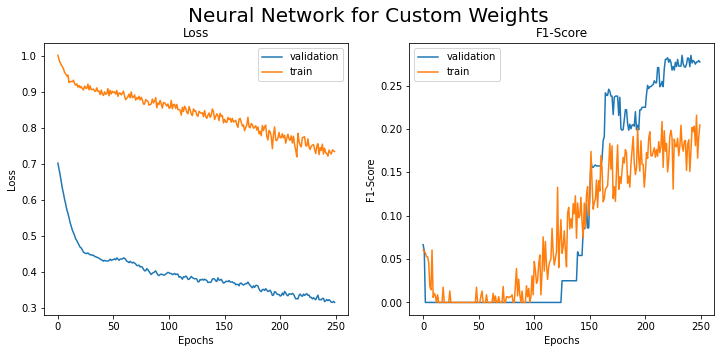

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_weights.history['val_loss'])
ax[0].plot(history_weights.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_weights.history['val_f1_m'])
ax[1].plot(history_weights.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for Custom Weights', fontsize=20)
plt.show()

# Compare Performance of Algorithms

In [195]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score']).sort_values('F1-Score')

,F1-Score
Neural Network ROSE,0.266075
Neural Network SMOTE,0.285057
SVM ROSE,0.290249
SVM SMOTE,0.293706
Neural Network with weights,0.306977
Random Forest SMOTE,0.349112
Random Forest ROSE,0.356364
Random Forest with weights,0.423913
SVM with weights,0.457143


# Podsumowanie

Biorąc pod uwagę powyższą analizę, nakreśliłem wstępny pipeline projektu:

1. Data preprocessing

    a) Opis próby normalizacji danych oraz co z tej normalizacji wynikło (zlokalizowano kolumny z wartościami bezwzględnymi)
    
    b) Selekcja cech - tutaj poczytałbym szczegółowo o każdym ze wskaźników, a potem wybrałbym podzbiór najistotniejszych z nich z punktu widzenia predykcji czy firma zbankrutuje (oczywiście z uzasadnieniem zawartym w samej pracy)
    
    c) Skalowanie danych (dla SVM i sieci) - jest kilka metod skalowania, można poeksperymentować z każdą i zobaczyć jak zachowują się algorytmy (proces selekcji odpowiedniego scaler-a dla tego datasetu też można szczegółowo opisać w pracy)
    
    
2. Porównanie trzech metod stosowanych przy uczeniu maszynowym na zbiorach niezbalansowanych

    a) ROSE (Random Oversamling)
    
    b) SMOTE
    
    c) Wagi dla klas przy obliczaniu funkcji kosztu

Wyniki, które pokazałem w ostatniej tabeli, co prawda nie robią może dużego wrażenia, natomiast w moim przeczuciu mają spory potencjał do poprawy ze względu na możliwość eksperymentowania z:
* selekcją cech,
* doborem hyperparametrów w algorytmach ML,
* architekturą sieci neuronowych,
* funkcją jądra w SVM

### Proponowany temat pracy inżynierskiej:

# Porównanie metod ROSE, SMOTE i wag klasowych na przykładzie niezbalansowanego zbioru danych dot. bankructw Tajwańskich spółek w okresie 1999-2009